<a href="https://colab.research.google.com/github/2yoojin/Ai/blob/main/%EC%88%AB%EC%9E%90%EC%86%90%EA%B8%80%EC%94%A8%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **숫자 손글씨 분류 ✍**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# **1. Data/library Import**

In [ ]:
# 데이터 불러오기 라이브러리
import pandas as pd
import numpy as np
import random as rnd

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from scipy.stats import norm
from scipy import stats
import io
import warnings
warnings.filterwarnings(action='ignore')

# keras 를 활용한 모델 개발
from tensorflow import keras

In [ ]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")
from matplotlib import font_manager, rc
rc("font", family="Malgun Gothic", size=18, weight='light')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train(7).csv') # 모델 학습 데이터
test = pd.read_csv('/content/drive/MyDrive/test(7).csv') # 모델 테스트 데이터
submission = pd.read_csv('/content/drive/MyDrive/submission(7).csv')

In [ ]:
train.shape, test.shape, submission.shape

((60000, 786), (10000, 785), (10000, 2))

# **2. EDA**


*   훈련세트 준비
*   DataFrame을 numpy 배열 형식으로 변환 (to_numpy() 활용)
*   **픽셀 최대값인 255로 나누어서 전처리**




# **2.0 train data**

In [ ]:
train.isnull().sum()

index    0
label    0
px1      0
px2      0
px3      0
        ..
px780    0
px781    0
px782    0
px783    0
px784    0
Length: 786, dtype: int64

In [ ]:
# 결측치 존재한다면 앞의 데이터로 채우기

train.fillna(method='ffill', inplace=True) 

In [ ]:
train.isnull().sum()
test.fillna(method='ffill', inplace=True)

index    0
label    0
px1      0
px2      0
px3      0
        ..
px780    0
px781    0
px782    0
px783    0
px784    0
Length: 786, dtype: int64

In [ ]:
train.head(10)

,index,label,px1,px2,px3,px4,px5,px6,px7,px8,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train_data 생성: index, label drop

train_data = train.drop(train.columns[[0,1]],axis=1)
train_data = train_data.to_numpy() 
train_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_x = train_data / 255 # 픽셀 최대값으로 나누어 0~1 사이 범위 갖도록 변경
train_x
print("\n\n")
train_x.shape

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(60000, 784)


*   기존 신경망에서의 표준화 전처리(평균=0, 표준편차 1)
*   이미지 경우, **픽셀의 최대값**인 **255**로 나누어서 전처리

In [ ]:
train_target = train[['label']]
train_target = train_target.to_numpy()
train_target # 훈련 타깃 저장

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]])

In [ ]:
train_y = train_target
train_y = train_y.flatten()

# **2.1 test data / submission data**

In [ ]:
test.head(10)
submission.head(10) # test data 에 대한 예측

,index,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,index,label
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
5,5,1
6,6,4
7,7,9
8,8,5
9,9,9


In [ ]:
test_data = test.drop(test.columns[[0]], axis = 1)
test_data = test_data.to_numpy()
test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
test_target = submission[['label']] # 숫자 손글씨의 진짜 숫자들
test_target = test_target.to_numpy().flatten() # 벡터화
test_target

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
test_x = test_data / 255 # 픽셀 최대값으로 나누기
test_y = test_target

In [ ]:
train_x, train_x.shape
print("\n")
train_y,train_y.shape
print("\n")
test_x,test_x.shape
print("\n")
test_y,test_y.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (60000, 784))

(array([5, 0, 4, ..., 5, 6, 8]), (60000,))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (10000, 784))

(array([7, 2, 1, ..., 4, 5, 6]), (10000,))

# **3. Modeling & Prediction**

# **3.1 다중 분류 신경망**



*   MultiClassNetwork 구현 코드로 다중 분류 신경망 훈련



**3.1.0 훈련/검정 세트 설정**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x = train_x.reshape(-1, 28, 28), test_x.reshape(-1, 28, 28) 

In [ ]:
train_x.shape

(60000, 28, 28)

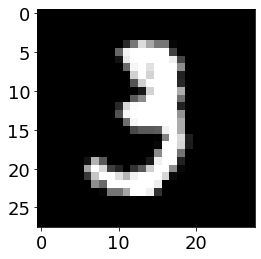

In [ ]:
plt.imshow(train_x[10],cmap='gray') 
plt.show()

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y,test_size=0.2, random_state=42)

In [ ]:
print('<training set>') 
x_train.shape, x_val.shape
print("\n\n<validation set>")
y_train.shape, y_val.shape
print("\n\n<test set>")
test_x.shape, test_y.shape

<training set>


((48000, 28, 28), (12000, 28, 28))



<validation set>


((48000,), (12000,))



<test set>


((10000, 28, 28), (10000,))

In [ ]:
# 28 x 28 배열을 1차원 배열로 바꿈 
x_train = x_train.reshape(-1,784) 
x_val=x_val.reshape(-1,784) 
x_test = test_x.reshape(-1,784) 
x_train.shape

(48000, 784)

In [ ]:
# 정수인 타깃값을 원-핫 인코딩(one-hot encoding)으로 변환

y_train = keras.utils.to_categorical(y_train, 10) 
y_val=keras.utils.to_categorical(y_val,10) 
y_test = keras.utils.to_categorical(test_y, 10)

In [ ]:
print('<training set>') 
x_train.shape, x_val.shape
print("\n\n<validation set>")
y_train.shape, y_val.shape
print("\n\n<test set>")
test_x.shape, test_y.shape

<training set>


((48000, 784), (12000, 784))



<validation set>


((48000, 10), (12000, 10))



<test set>


((10000, 28, 28), (10000,))

**3.1.1 다중 분류 신경망 구현 코드**


*   교재 깃허브 참고





In [ ]:
class MultiClassNetwork1:
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0,l2 =0):
        self.units = units         # 은닉층의 뉴런 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.sigmoid(z1)               # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def softmax(self, z):
        # 소프트맥스 함수
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)
 
    def init_weights(self, n_features, n_classes): # 가중치 초기화
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, n_classes))   # (은닉층의 크기, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None): # 훈련
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            num = self.update_val_loss(x_val, y_val)
            print('epochs = ',i+1,'val_loss = %.3f'%num)
            

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):  # 가중치/절편 업데이트
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.softmax(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x): # 예측
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return np.argmax(z, axis=1)  # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y): # 검증
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def reg_loss(self): # 손실 계산
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.softmax(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 크로스 엔트로피 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))
        return (val_loss + self.reg_loss()) / len(y_val)

**3.1.2 모델 생성**

In [ ]:
model1=MultiClassNetwork1(units=100, batch_size=256) 
model1.fit(x_train,y_train,x_val=x_val,y_val=y_val,epochs=200)

epochs =  1 val_loss = 1.839
epochs =  2 val_loss = 1.240
epochs =  3 val_loss = 0.998
epochs =  4 val_loss = 0.867
epochs =  5 val_loss = 0.783
epochs =  6 val_loss = 0.720
epochs =  7 val_loss = 0.674
epochs =  8 val_loss = 0.635
epochs =  9 val_loss = 0.607
epochs =  10 val_loss = 0.581
epochs =  11 val_loss = 0.559
epochs =  12 val_loss = 0.540
epochs =  13 val_loss = 0.525
epochs =  14 val_loss = 0.509
epochs =  15 val_loss = 0.496
epochs =  16 val_loss = 0.486
epochs =  17 val_loss = 0.475
epochs =  18 val_loss = 0.466
epochs =  19 val_loss = 0.455
epochs =  20 val_loss = 0.448
epochs =  21 val_loss = 0.440
epochs =  22 val_loss = 0.433
epochs =  23 val_loss = 0.427
epochs =  24 val_loss = 0.420
epochs =  25 val_loss = 0.414
epochs =  26 val_loss = 0.409
epochs =  27 val_loss = 0.403
epochs =  28 val_loss = 0.400
epochs =  29 val_loss = 0.394
epochs =  30 val_loss = 0.390
epochs =  31 val_loss = 0.385
epochs =  32 val_loss = 0.381
epochs =  33 val_loss = 0.378
epochs =  34 val_lo

**3.1.3 학습곡선 확인**

Text(0, 0.5, 'loss')

Text(0.5, 0, 'iteration')

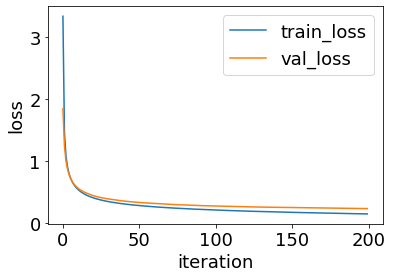

In [ ]:
plt.plot(model1.losses)
plt.plot(model1.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()



*   훈련 손실과 검증 손실 초반에 빠르게 감소하다가 점점 일정 값에 수렴하는 모습



In [ ]:
model1.score(x_test,y_test)

0.9374



*   다중 분류 코드로 모델 학습한 결과 정확도 0.9374
*   이미지 분류에 적합한 합성곱 신경망을 통해 정확도 향상 시도



# **3.2 합성곱 (CNN) 신경망**

*   Keras? 사용자가 Tensorflow 를 편리하게 사용할 수 있도록 제공하는 패키지
*   Keras 로 합성곱 신경망 구현




**3.2.0 훈련/검증 데이터 설정**

In [ ]:
train_x, test_x = train_x.reshape(-1, 28, 28, 1), test_x.reshape(-1, 28, 28, 1) # 합성곱 신경망을 위한 깊이 추가 (풍부한 특징 추출)

In [ ]:
train_x.shape

(60000, 28, 28, 1)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
print('<training set>') 
x_train.shape, x_val.shape
print("\n\n<validation set>")
y_train.shape, y_val.shape
print("\n\n<test set>")
test_x.shape, test_y.shape

<training set>


((48000, 28, 28, 1), (12000, 28, 28, 1))



<validation set>


((48000,), (12000,))



<test set>


((10000, 28, 28, 1), (10000,))

**3.2.1 모델 생성**







# **Conv1 모델**





*  Convolution 2D 를 한번만 쌓음
*   target 원핫 인코딩 진행하지 않고 정수 형태 그대로 진행 - 손실함수 'sparse_categorical_crossentropy'

**1. 모델 레이어 추가**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
conv1 = Sequential()
conv1.add(Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D(pool_size=(2, 2), strides=None))
conv1.add(Flatten())
conv1.add(Dense(32, activation='relu')) # 은닉층: 렐루 활성화함수
conv1.add(Dropout(0.2))
conv1.add(Dense(32, activation='relu'))
conv1.add(Dropout(0.2))
conv1.add(Dense(10, activation='softmax')) # 출력층: 소프트맥스 활성화함수



*   **Con2D** - filter (픽셀을 어떻게 뭉쳐서 볼 것인지 결정하는 윈도우, 이미지에서 특징 분리해내는 기능, 출력차원의 깊이 결정): 32개 kernel_size (합성곱에 사용되는 필터의 크기): (3,3) 활성화 함수: relu 입력 데이터 사이즈: 28x28=784개 Padding (출력 데이터의 공간크기 조절 기능): same padding 


     *   same padding (출력 배열의 길이를 원본 배열과 동일하게 함)
     *   full padding (원본 배열 원소의 연산 참여도를 동일하게 함)
     *   valid padding (원본 입력 배열(x)에 가중치(w)를 그대로 적용)

*   **MaxPooling2D** (지정한 kernel만큼 훑으면서 가장 큰 값만 남기는 것으로, 각각의 구역에서 최댓값을 찾는 방법) - pool_size: (2,2), stride (필터 이동 간격 조절): None

*   **Flatten** - 1차원 텐서(샘플 차원 포함)로 변환

*   **Dropout** - 뉴런들 중 일부 뉴런이 연산에서 무작위로 제외, 오버피팅 방지 위해 무작위로 이전 레이어 출력의 20% 를 제거

*   **Dense** 
    1. 히든 레이어 노드 수 32개, 활성화 함수 relu
    2. 출력 레이어 노드 개수 10개, 활성화 함수 추가 softmax (출력값 간의 편차가 커지기 때문에 분류가 쉬워짐)



In [ ]:
conv1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_22 (Dense)            (None, 32)                200736    
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                     

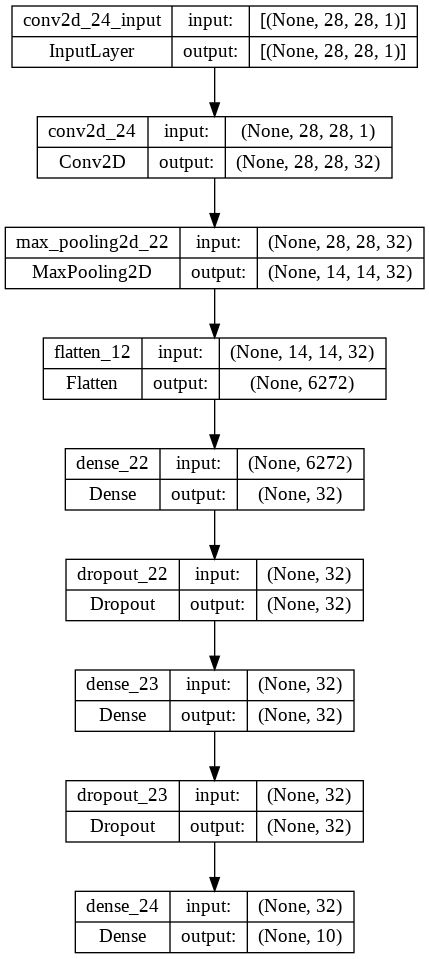

In [ ]:
from keras.utils import plot_model
plot_model(conv1, show_shapes=True, to_file='model.png')

**2. 최적화 알고리즘과 손실함수 선택**

In [ ]:
conv1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

최적화 알고리즘: Adam (adaptive moment estimation)



손실함수 종류
    
  1.   categorical_crossentropy: 모델 출력 one-hot 인코딩이 되어 있는 경우
  2. **sparse_categorical_crossentropy**: 모델 출력 정수인 경우

metrics: 모델 평가 위해 사용, 정확도로 설정

**3. Checkpoint 와 EarlyStopping**


*   Checkpoint - 가장 best model을 로드하여 학습을 재게
*   EarlyStopping - 모델의 성능 지표가 설정한 에포크동안 개선되지 않을 때 조기 종료 실행



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 최고 성능 모델 저장 (검증 세트 손실이 낮아질 때 갱신)
checkpoint = ModelCheckpoint('best', monitor='val_loss', save_best_only=True, mode='auto')
# 10번의 에포크 이상 검증 세트에서 손실이 감소하지 않으면 학습 자동 중단
early_stop = EarlyStopping(monitor='val_loss',patience=10)

**4. 모델 훈련 & 기록**


*   학습 데이터셋 사용하여 모델 30번 반복 훈련
*   테스트 데이터셋 사용하여 모델 평가





In [ ]:
history1 = conv1.fit(train_x, train_y,
                    validation_data=(test_x, test_y), # 검증데이터 세트 설정
                    callbacks=[checkpoint, early_stop], # 체크포인트, 조기종료 
                    epochs=30) # 에포크 총 30회 설정

Epoch 1/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.4226 - accuracy: 0.8683

1875/1875 [==============================] - 57s 30ms/step - loss: 0.4224 - accuracy: 0.8684 - val_loss: 0.0822 - val_accuracy: 0.9744
Epoch 2/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.1692 - accuracy: 0.9509

1875/1875 [==============================] - 38s 21ms/step - loss: 0.1691 - accuracy: 0.9509 - val_loss: 0.0582 - val_accuracy: 0.9808
Epoch 3/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.1288 - accuracy: 0.9623

1875/1875 [==============================] - 37s 20ms/step - loss: 0.1287 - accuracy: 0.9623 - val_loss: 0.0487 - val_accuracy: 0.9837
Epoch 4/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.1072 - accuracy: 0.9685

1875/1875 [==============================] - 38s 20ms/step - loss: 0.1073 - accuracy: 0.9685 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 5/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0912 - accuracy: 0.9729 - val_loss: 0.0390 - val_accuracy: 0.9862
Epoch 6/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.0409 - val_accuracy: 0.9868
Epoch 7/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0722 - accuracy: 0.9774 - val_loss: 0.0414 - val_accuracy: 0.9872
Epoch 8/30
1875/1875 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9794

1875/1875 [==============================] - 38s 20ms/step - loss: 0.0650 - accuracy: 0.9794 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 9/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0617 - accuracy: 0.9807 - val_loss: 0.0426 - val_accuracy: 0.9874
Epoch 10/30
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0470 - val_accuracy: 0.9856
Epoch 11/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.0441 - val_accuracy: 0.9874
Epoch 12/30
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.0388 - val_accuracy: 0.9879
Epoch 13/30
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.0409 - val_accuracy: 0.9888
Epoch 14/30
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0389 - val_a

**5. 모델 정확도 평가**

Text(0.5, 1.0, 'Loss')

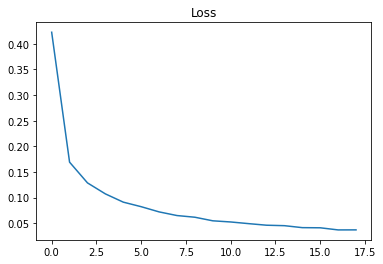

In [ ]:
plt.plot(history1.history['loss'])
plt.title("Loss")
plt.show()

Text(0.5, 1.0, 'Accuracy')

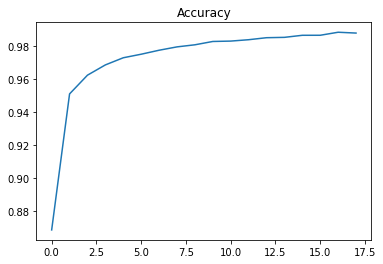

In [ ]:
plt.plot(history1.history['accuracy'])
plt.title("Accuracy")
plt.show()



*   에포크 진행할수록 손실은 작아지고 정확도는 높아짐



**6. 가장 best 신경망 모델 호출 & 예측 확인**

In [ ]:
best_conv1 = keras.models.load_model('best') # 예측을 위해 저장해 두었던 best 모델 호출

In [ ]:
prediction = best_conv1.predict(test_x) # 숫자 손글씨 예측

313/313 [==============================] - 2s 8ms/step


In [ ]:
prediction

array([[8.59816707e-14, 8.75923245e-09, 2.63136823e-09, ...,
        9.99998271e-01, 1.07744135e-11, 9.28897236e-07],
       [1.12905220e-10, 6.33470787e-09, 9.99999940e-01, ...,
        1.39451051e-09, 1.53428468e-11, 1.16564148e-13],
       [2.31612840e-10, 9.99974430e-01, 2.32685966e-06, ...,
        4.20293645e-06, 9.56492204e-06, 2.72629599e-08],
       ...,
       [5.31084135e-14, 1.46252876e-14, 3.08964659e-12, ...,
        3.10579895e-09, 3.38192030e-09, 3.93175185e-07],
       [2.67709439e-13, 1.91889248e-11, 3.51271512e-18, ...,
        5.20588143e-15, 2.58023096e-08, 1.08082954e-09],
       [1.49747037e-09, 2.18168684e-14, 8.89442532e-15, ...,
        2.15907569e-22, 1.67451556e-11, 4.40648969e-14]], dtype=float32)

In [ ]:
prediction[0]

array([8.59816707e-14, 8.75923245e-09, 2.63136823e-09, 7.10565701e-07,
       2.93701530e-09, 1.15593339e-13, 7.41476231e-16, 9.99998271e-01,
       1.07744135e-11, 9.28897236e-07], dtype=float32)

In [ ]:
np.argmax(prediction[0])  # 가장 갚이 높은 index 

7

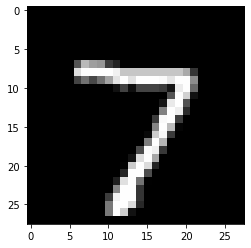

In [ ]:
plt.imshow(test_x[0].reshape(28,28),cmap='gray')



*   prediction[0]에서 index 7의 값이 가장 높음
*   예측값과 실제 숫자 일치



예측: 6
실제: AxesImage(54,36;334.8x217.44)


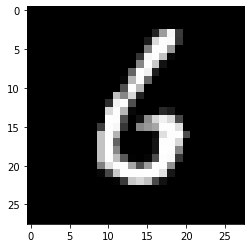

In [ ]:
print("예측:",np.argmax(prediction[50]))
print("실제:",plt.imshow(test_x[50].reshape(28,28),cmap='gray'))

예측: 3
실제: AxesImage(54,36;334.8x217.44)


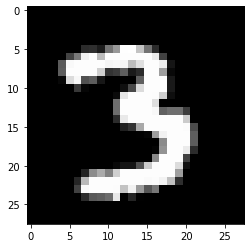

In [ ]:
print("예측:",np.argmax(prediction[500]))
print("실제:",plt.imshow(test_x[500].reshape(28,28),cmap='gray'))

In [ ]:
number = submission.copy() 
numberprediction = []
for i in range(10000):
  numberprediction.append(np.argmax(prediction[i])) 

number['label'] = numberprediction
number['label']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
number.to_csv('result_number1.csv',index=False) # 제출 파일 저장

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

# **Conv2 모델**



*   Conv2D, MaxPooling 합성곱과 풀링층의 반복 구성
*   필터 크기 (4,4): 커널 시야 확장
*   target 원핫 인코딩 진행하여 벡터 형태로 - 손실함수 categorical_crossentropy
*   callbacks=[checkpoint, early_stop] 적용 X




**1. 모델 레이어 추가**

In [ ]:
conv2 = Sequential()

conv2.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D(pool_size=(2, 2), strides=None))

conv2.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D(pool_size=(2, 2), strides=None))
conv2.add(Dropout(0.25))

conv2.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D(pool_size=(2, 2), strides=None))
conv2.add(Dropout(0.25))
conv2.add(Flatten())

conv2.add(Dense(32, activation='relu'))
conv2.add(Dropout(0.25))
conv2.add(Dense(10, activation='softmax')) # 출력층: 소프트맥스 활성화함수

In [ ]:
conv2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 32)        16416     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 7, 7, 32)          0         
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 32)        

**2. 최적화 알고리즘과 손실함수 선택**

In [ ]:
conv2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

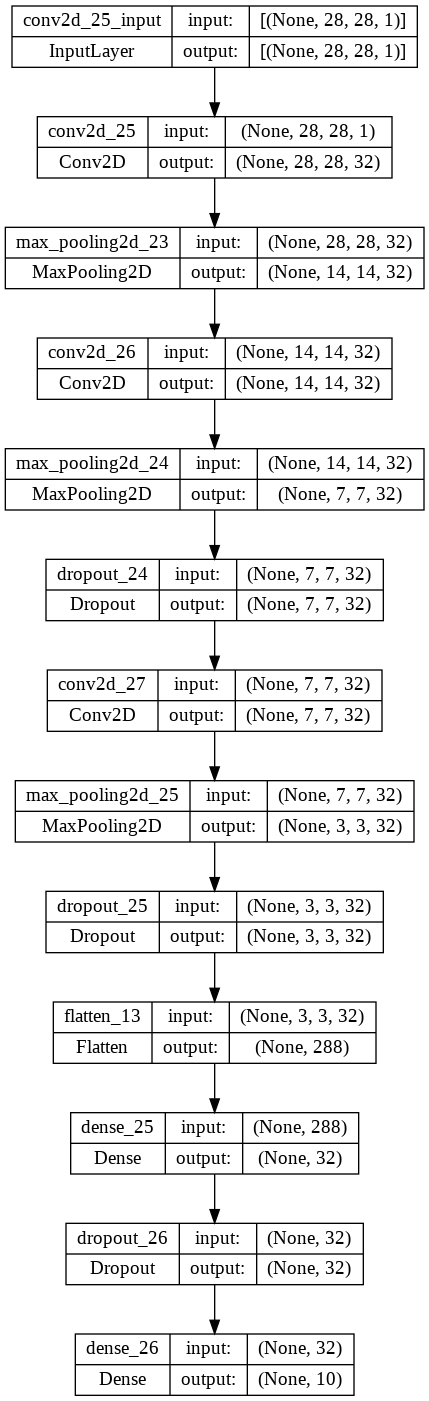

In [ ]:
from keras.utils import plot_model
plot_model(conv2, show_shapes=True, to_file='model.png')

**3. target One-hot encoding**

In [ ]:
from keras.utils import np_utils

In [ ]:
train_yoh=np_utils.to_categorical(train_y)
train_yoh.shape

(60000, 10)

In [ ]:
train_x.shape

(60000, 28, 28, 1)

**4. 모델 훈련 & 기록**

In [ ]:
history2 = conv2.fit(train_x, train_yoh,
                    validation_split=0.2,
                    epochs=25,batch_size=300,verbose=2)

Epoch 1/25
160/160 - 71s - loss: 0.8788 - accuracy: 0.7063 - val_loss: 0.1420 - val_accuracy: 0.9605 - 71s/epoch - 446ms/step
Epoch 2/25
160/160 - 66s - loss: 0.2534 - accuracy: 0.9236 - val_loss: 0.0901 - val_accuracy: 0.9732 - 66s/epoch - 415ms/step
Epoch 3/25
160/160 - 67s - loss: 0.1824 - accuracy: 0.9458 - val_loss: 0.0695 - val_accuracy: 0.9787 - 67s/epoch - 416ms/step
Epoch 4/25
160/160 - 68s - loss: 0.1463 - accuracy: 0.9574 - val_loss: 0.0592 - val_accuracy: 0.9813 - 68s/epoch - 427ms/step
Epoch 5/25
160/160 - 66s - loss: 0.1254 - accuracy: 0.9630 - val_loss: 0.0550 - val_accuracy: 0.9838 - 66s/epoch - 415ms/step
Epoch 6/25
160/160 - 66s - loss: 0.1113 - accuracy: 0.9673 - val_loss: 0.0475 - val_accuracy: 0.9868 - 66s/epoch - 412ms/step
Epoch 7/25
160/160 - 69s - loss: 0.0983 - accuracy: 0.9705 - val_loss: 0.0433 - val_accuracy: 0.9878 - 69s/epoch - 434ms/step
Epoch 8/25
160/160 - 70s - loss: 0.0894 - accuracy: 0.9730 - val_loss: 0.0390 - val_accuracy: 0.9893 - 70s/epoch - 436

**5. 모델 정확도 평가**

Text(0.5, 1.0, 'Loss')

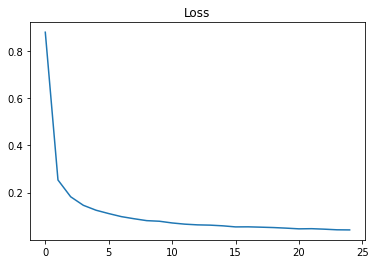

In [ ]:
plt.plot(history2.history['loss'])
plt.title("Loss")
plt.show()

Text(0.5, 1.0, 'Accuracy')

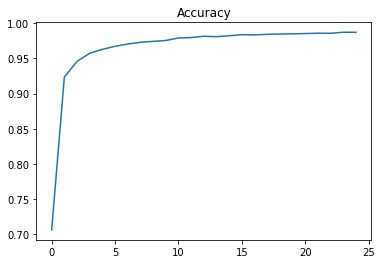

In [ ]:
plt.plot(history2.history['accuracy'])
plt.title("Accuracy")
plt.show()

In [ ]:
score = conv2.evaluate(test_x, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028099065646529198
Test accuracy: 0.991599977016449


**6. 예측 진행 & 틀린 예측 랜덤 확인**

In [ ]:
prediction = conv2.predict(test_x)

313/313 [==============================] - 4s 13ms/step


In [ ]:
prediction[0]

array([2.2395559e-16, 2.8235245e-09, 1.6463936e-10, 8.7702996e-12,
       3.3982431e-12, 7.5830320e-15, 1.0791617e-20, 9.9999994e-01,
       5.6547892e-13, 3.7946823e-08], dtype=float32)

In [ ]:
prediction = np.argmax(prediction,axis=-1)
prediction.shape

(10000,)

In [ ]:
number = submission.copy() 
number['label'] = prediction
number['label']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
number.to_csv('result_number2.csv',index=False) # 제출 파일 저장

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Real number:5, my Prediction:3')

Text(0.5, 1.0, 'Real number:9, my Prediction:7')

Text(0.5, 1.0, 'Real number:0, my Prediction:5')

Text(0.5, 1.0, 'Real number:8, my Prediction:6')

Text(0.5, 1.0, 'Real number:5, my Prediction:6')

Text(0.5, 1.0, 'Real number:9, my Prediction:8')

Text(0.5, 1.0, 'Real number:0, my Prediction:6')

Text(0.5, 1.0, 'Real number:4, my Prediction:8')

Text(0.5, 1.0, 'Real number:9, my Prediction:4')

Text(0.5, 1.0, 'Real number:7, my Prediction:8')

Text(0.5, 1.0, 'Real number:7, my Prediction:9')

Text(0.5, 1.0, 'Real number:7, my Prediction:8')

Text(0.5, 1.0, 'Real number:8, my Prediction:9')

Text(0.5, 1.0, 'Real number:0, my Prediction:9')

Text(0.5, 1.0, 'Real number:9, my Prediction:8')

Text(0.5, 1.0, 'Real number:7, my Prediction:2')

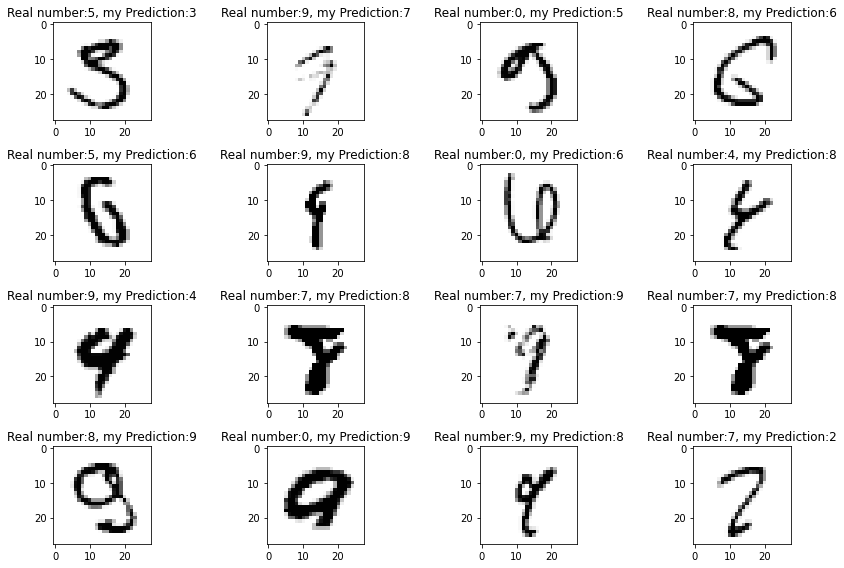

In [ ]:
import random


test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if prediction[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_x[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Real number:" + str(test_labels[n]) + ", my Prediction:" + str(prediction[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()


*   랜덤하게 틀린 예측 확인한 결과, 꽤 애매하게 적힌 숫자 손글씨가 몇개 보임 (특히 실제는 8인데, 9로 예측한 경우)

#**Conv3 모델**



*   필터 크기 (5,5): 커널 시야 확장



**1. 모델 레이어 추가**

In [ ]:
conv3 = Sequential()
conv3.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',activation='relu',
                 input_shape=(28, 28, 1)))
conv3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

conv3.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
conv3.add(MaxPooling2D(pool_size=(2, 2)))
conv3.add(Dropout(0.25))
conv3.add(Flatten())

conv3.add(Dense(1000, activation='relu'))
conv3.add(Dropout(0.5))
conv3.add(Dense(10, activation='softmax'))
conv3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
conv3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 flatten_11 (Flatten)        (None, 3136)            

**2. 최적화 알고리즘과 손실함수 선택**

In [ ]:
conv3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

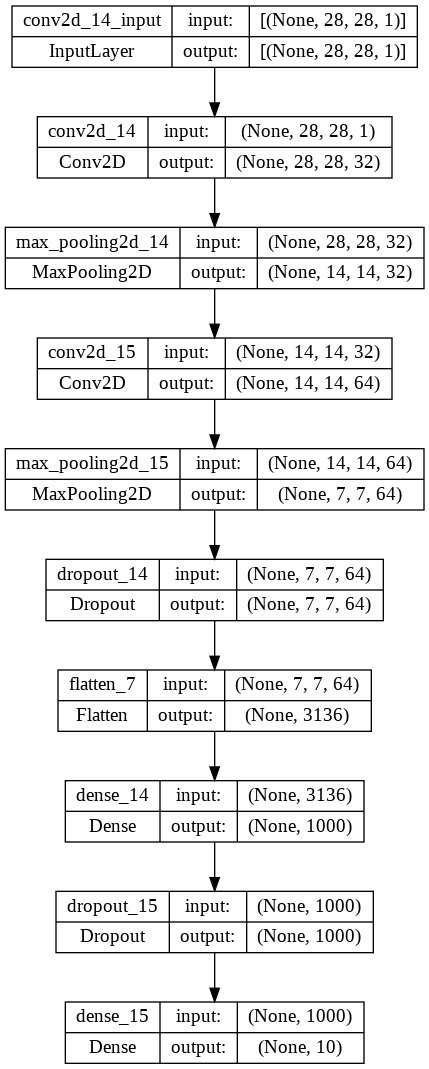

In [ ]:
from keras.utils import plot_model
plot_model(conv3, show_shapes=True, to_file='model.png')

**3. 모델 훈련 & 기록**

In [ ]:
train_x.shape

(60000, 28, 28, 1)

In [ ]:
train_yoh=np_utils.to_categorical(train_y)
train_yoh.shape

(60000, 10)

In [ ]:
train_x.shape, train_yoh.shape
test_x.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10))

((10000, 28, 28, 1), (10000, 10))

In [ ]:
history3 = conv3.fit(train_x, train_yoh,epochs=25,
                 batch_size=300,verbose=1, validation_data=(test_x, y_test))

Epoch 1/25
200/200 [==============================] - 85s 423ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 2/25
200/200 [==============================] - 84s 421ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0318 - val_accuracy: 0.9888
Epoch 3/25
200/200 [==============================] - 83s 414ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0258 - val_accuracy: 0.9914
Epoch 4/25
200/200 [==============================] - 81s 406ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0251 - val_accuracy: 0.9916
Epoch 5/25
200/200 [==============================] - 83s 413ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0233 - val_accuracy: 0.9922
Epoch 6/25
200/200 [==============================] - 83s 414ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0218 - val_accuracy: 0.9925
Epoch 7/25
200/200 [==============================] - 81s 404ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0284 - val_ac

**5. 모델 정확도 평가**

Text(0.5, 1.0, 'Loss')

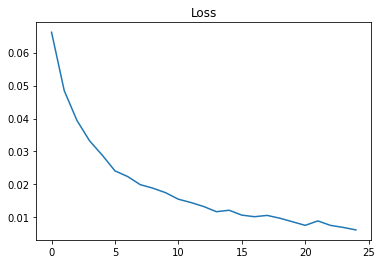

In [ ]:
plt.plot(history3.history['loss'])
plt.title("Loss")
plt.show()

Text(0.5, 1.0, 'Accuracy')

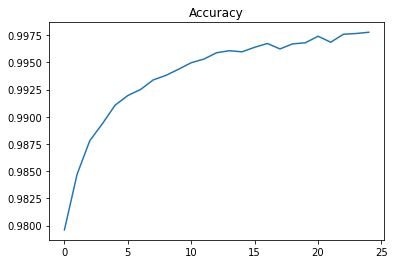

In [ ]:
plt.plot(history3.history['accuracy'])
plt.title("Accuracy")
plt.show()

In [ ]:
score = conv3.evaluate(test_x, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02482585422694683
Test accuracy: 0.9940000176429749


**5. 예측 확인**

In [ ]:
prediction = conv3.predict(test_x)
prediction[0]

313/313 [==============================] - 5s 16ms/step


array([5.3416557e-14, 5.2494887e-11, 7.0396434e-14, 6.9271977e-11,
       8.4575437e-12, 1.0018031e-13, 9.4822660e-16, 9.9999994e-01,
       2.0597659e-13, 3.7691500e-10], dtype=float32)

In [ ]:
prediction = np.argmax(prediction,axis=-1)
prediction.shape

(10000,)

In [ ]:
number = submission.copy() 
number['label'] = prediction
number['label']   
number.to_csv('result_number3.csv',index=False) # 제출 파일 저장

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Real number:7, my Prediction:1')

Text(0.5, 1.0, 'Real number:7, my Prediction:2')

Text(0.5, 1.0, 'Real number:2, my Prediction:7')

Text(0.5, 1.0, 'Real number:0, my Prediction:9')

Text(0.5, 1.0, 'Real number:8, my Prediction:9')

Text(0.5, 1.0, 'Real number:7, my Prediction:1')

Text(0.5, 1.0, 'Real number:4, my Prediction:8')

Text(0.5, 1.0, 'Real number:7, my Prediction:2')

Text(0.5, 1.0, 'Real number:7, my Prediction:2')

Text(0.5, 1.0, 'Real number:9, my Prediction:7')

Text(0.5, 1.0, 'Real number:4, my Prediction:9')

Text(0.5, 1.0, 'Real number:8, my Prediction:5')

Text(0.5, 1.0, 'Real number:6, my Prediction:1')

Text(0.5, 1.0, 'Real number:6, my Prediction:1')

Text(0.5, 1.0, 'Real number:6, my Prediction:1')

Text(0.5, 1.0, 'Real number:2, my Prediction:7')

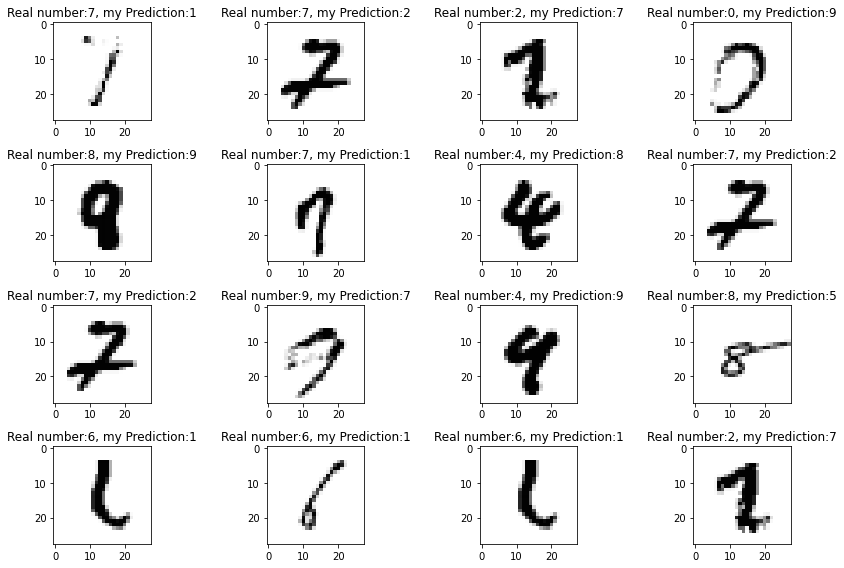

In [ ]:
import random


test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if prediction[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_x[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Real number:" + str(test_labels[n]) + ", my Prediction:" + str(prediction[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()



*   랜덤하게 틀린 예측 확인한 결과, 꽤 애매하게 적힌 숫자 손글씨가 몇개 보임 (특히 실제는 8인데, 9로 예측한 경우)



# **4. Dacon 참여 결과/총 정리**

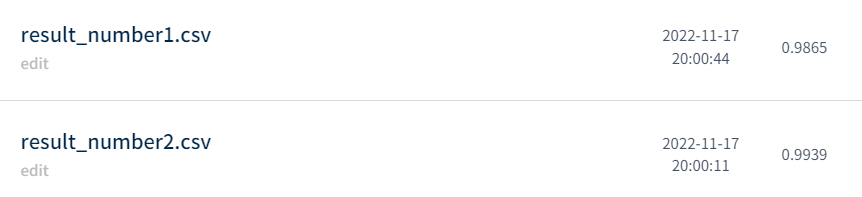

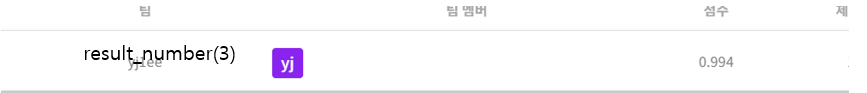



*   conv1 모델 점수 0.9843
*   conv2 모델 점수 0.9939
*   conv3 모델 점수 0.994

다중 분류 코드로 모델 예측하는 것보다 합성곱으로 모델 예측한 경우 더 높은 정확도를 낼 수 있었으며, 합성곱과 풀링층을 한번만 쌓았을 때보다 반복하여 구성하고 커널 사이즈를 5,5 로 설정하였을 때 가장 높은 정확도를 보임
